# Cazatalentos
Por: Alejandro Uribe
Fecha: 2023-09-10

Power

False Discovery Rate

In [1255]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection

## Constantes

In [1256]:
alpha = 0.05
random_seed = 195581
alternative = 'greater'

Se tienen dos jugadoras idénticas (excepto su nombre) con una probabilidad de enceste de `0.7`, se les hace tirar cien veces y se repite la ronda una segunda vez para descartar que haya sido pura suerte.

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

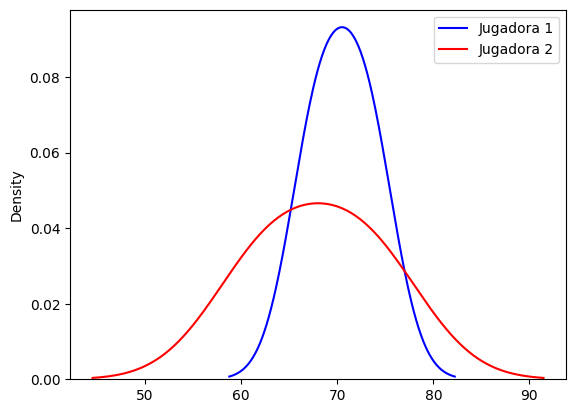

In [1257]:
np.random.seed(random_seed)
cestas_1 = np.random.binomial(100, 0.7, 2)
cestas_2 = np.random.binomial(100, 0.7, 2)
sns.kdeplot(cestas_1, color='blue', label='Jugadora 1')
sns.kdeplot(cestas_2, color='red', label='Jugadora 2')
plt.legend()
plt.show()

Como se observa en la distribución, no hay diferencia en el número de encestes. Hecho que tiene sentido ya que provienen de la misma distribución. Si se lleva a cabo un test ANOVA,

- **Null Hypothesis (H0):** The means of all groups are equal.
- **Alternative Hypothesis (H1):** At least one group mean is different.

No se rechaza la hipótesis nula ya que el p-value es mayor que el nivel de significancia. Es decir, no hay diferencia en los grupos.

In [1258]:
p_value = ttest_ind(cestas_1, cestas_2, alternative=alternative)[1]
print(p_value)

0.3492443277111182


In [1259]:
p_value <= alpha

False

El experimento se puede repetir `n` veces y se grafican los `p-values`. Se observa que los p-values se distribuyen normalmente. No obstante, si `n=10000` y `alpha=0.05`, se rechaza la hipótesis nula en el 5% de los casos. Esto es un error tipo I. En otras palabras, 500 veces se rechaza la hipótesis nula cuando no se debería.

In [1260]:
np.random.seed(random_seed)
experiments = []

for i in range(0,10000):
    cestas_1 = np.random.binomial(100, 0.7, 2)
    cestas_2 = np.random.binomial(100, 0.7, 2)

    experiments.append(ttest_ind(cestas_1, cestas_2, alternative=alternative)[1])

/Users/uribe/miniconda3/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


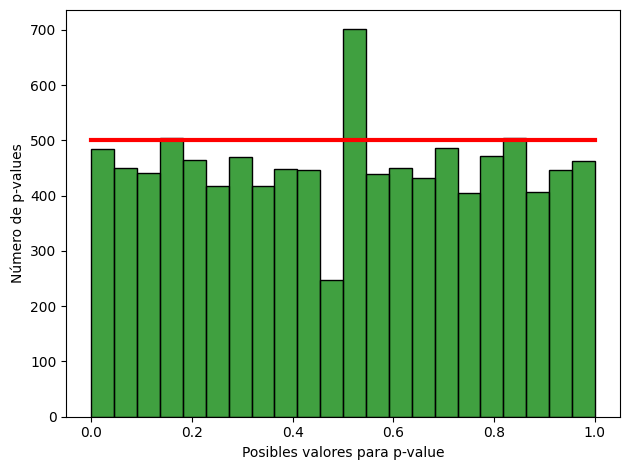

In [1261]:
sns.histplot(experiments, color='green', label='p-value')
plt.plot([0,1], [500,500], color='red', linewidth=3)
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.tight_layout()

Del gráfico anterior se aprecia que cada `bin` contiene el 5% de los p-values, es decir hay unos 500 p-values por `bin`.

Por otro lado, si se considera el caso en el que las probabilidades de enceste sean distintas para cada jugadora, se observa que el número de encestes es distinto.

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

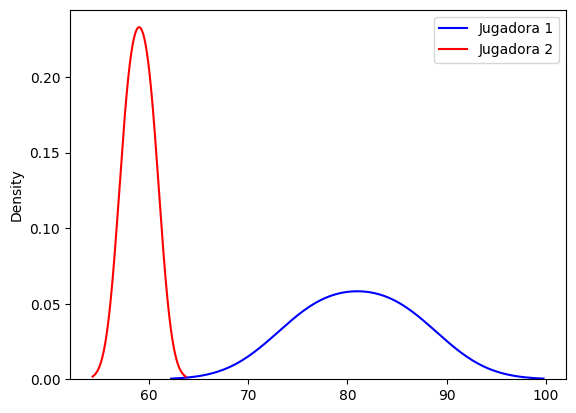

In [1262]:
np.random.seed(random_seed)
cestas_1 = np.random.binomial(100, 0.8, 2)
cestas_2 = np.random.binomial(100, 0.59, 2)
sns.kdeplot(cestas_1, color='blue', label='Jugadora 1')
sns.kdeplot(cestas_2, color='red', label='Jugadora 2')
plt.legend()
plt.show()

In [1263]:
p_value = ttest_ind(cestas_1, cestas_2, alternative=alternative)[1]
print(p_value)

0.016687747319878526


In [1264]:
p_value <= alpha

True

In [1265]:
np.random.seed(random_seed)
experiments = []

for i in range(0, 10000):
    cestas_1 = np.random.binomial(100, 0.70, 2)
    cestas_2 = np.random.binomial(100, 0.59, 2)

    experiments.append(ttest_ind(cestas_1, cestas_2, alternative=alternative)[1])

/Users/uribe/miniconda3/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


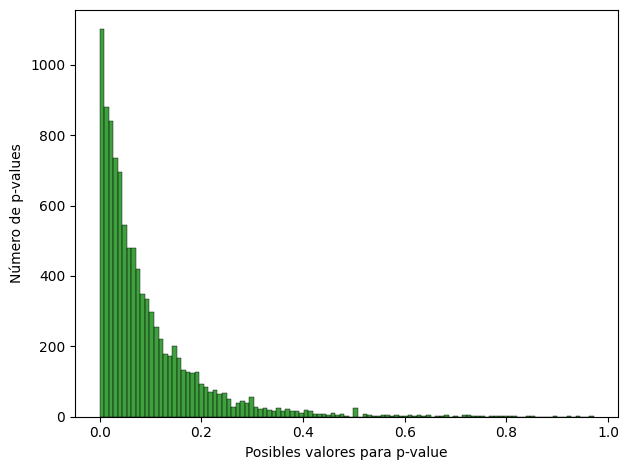

In [1266]:
sns.histplot(experiments, color='green', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.tight_layout()

La mayoría de los p-values son menores que el nivel de significancia `0.05`, por lo que se rechaza la hipótesis nula. Es decir, hay diferencia en los grupos.

Por otro lado, aquellos `p-values` que son mayores que el nivel de significancia, se consideran como errores tipo II (falsos negativos). Es decir, se acepta la hipótesis nula cuando no se debería. Ello por el overlap que hay entre las distribuciones.

In [1267]:
rejected, p_values_corrected = fdrcorrection(experiments, alpha=alpha, is_sorted=False)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


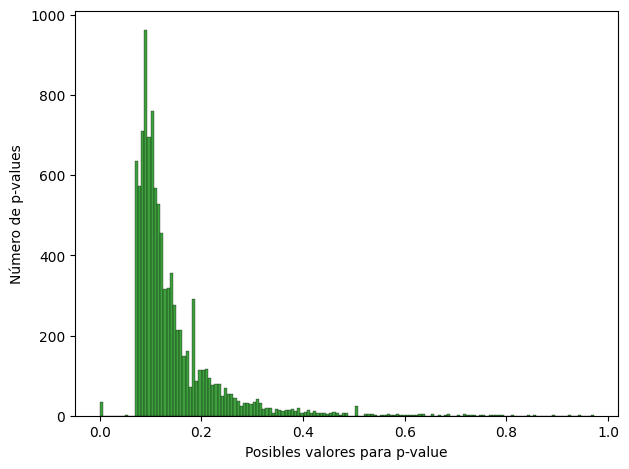

In [1268]:
sns.histplot(p_values_corrected, color='green', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.tight_layout()

In [1269]:
sum(rejected)/len(rejected) * 100

0.35000000000000003

# Cazatalentos

In [1270]:
cazatalentos = {}

In [1271]:
def run_cazatalentos(prob_enceste_jugadoras: list, tiros:int, rondas:int=1, repeticiones:int=1000):
    np.random.seed(random_seed)
    p_values = []
    cazatalentos_temp = {}
    for n_jugadora, prob_enceste  in enumerate(prob_enceste_jugadoras):
        for _ in range(repeticiones):
            cestas_jugadora = np.random.binomial(tiros, prob_enceste, rondas)
            lista_cestas_jugadora = cazatalentos_temp.get(n_jugadora, [])
            lista_cestas_jugadora.append(cestas_jugadora[0])
            cazatalentos_temp[n_jugadora] = lista_cestas_jugadora
        if n_jugadora > 0:
            p_values.append(ttest_ind(cazatalentos_temp[0], cazatalentos_temp[n_jugadora],alternative=alternative)[1])
    rejected, q_values = fdrcorrection(p_values, alpha=alpha, is_sorted=False)
    return cazatalentos_temp, p_values, q_values, rejected

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)

vec_ftirar = np.vectorize(ftirar)

def p_correcta(jugadoras, tiros=[100],repetciones=1000):
  print("Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones")
  for nt in tiros:
    aciertos_mejor = 0
    primera_ganadora = 0
    for i in range(repetciones):
      vaciertos = vec_ftirar(jugadoras, nt)
      mejor_ronda= np.argmax(vaciertos)
      aciertos_mejor += vaciertos[0]
      if mejor_ronda == 0:
        primera_ganadora += 1
    print(nt, "\t", primera_ganadora/repetciones, "\t \t", aciertos_mejor/repetciones,"\t", aciertos_mejor/nt/repetciones,"\t",repetciones)

  return primera_ganadora/repetciones, aciertos_mejor/nt/repetciones

## Cazatalentos 1
Llegué a la localidad habían 100 adolescentes en el gimnasio, hice tirar a cada una
100 tiros, sólo una obtuvo 80 aciertos, luego un par 79, otro par 78, y así descendían.

In [1272]:
n_czt = 1
rondas = 1
mejor = 0.8
tiros = 100
jugadoras = 100
prob_enceste_jugadoras = [0.80]+ [0.79]*2 + [0.78]*2
prob_enceste_jugadoras = np.append(prob_enceste_jugadoras, np.linspace(0.77, 0.10, jugadoras-len(prob_enceste_jugadoras)))

In [1273]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.249 	 	 79.979 	 0.79979 	 1000


In [1274]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

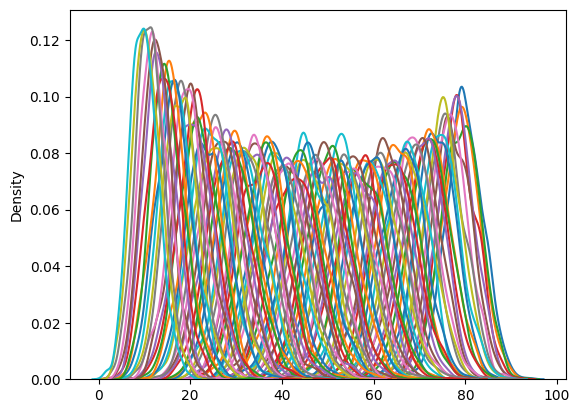

In [1275]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}', warn_singular=False)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

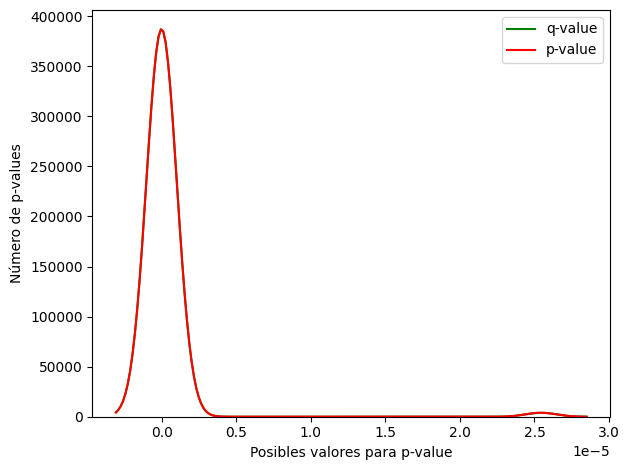

In [1276]:
sns.kdeplot(q_values, color='green', label='q-value')
sns.kdeplot(p_values, color='red', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.legend()
plt.tight_layout()

La mayoría de los p-valores y q-valores se encuentran cercanos a cero, una fuerte evidencia de que los resultados tienen una baja posibilidad de corresponder a un falso descubrimiento.

In [1277]:
sum(rejected)/len(rejected)

1.0

In [1278]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 2
Llegué a una pequeña ciudad y habían 200 adolescentes en el gimnasio, hice tirar
a cada una 100 tiros, sólo una obtuvo 80 aciertos, seis 79, cinco 78, y así descendían.

In [1279]:
n_czt = 2
rondas = 1
mejor = 0.8
tiros = 100
jugadoras = 200
prob_enceste_jugadoras = [mejor]+ [0.79]*6 + [0.78]*5
prob_enceste_jugadoras = np.append(prob_enceste_jugadoras, np.linspace(0.77, 0.10, jugadoras-len(prob_enceste_jugadoras) ))

In [1280]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.152 	 	 79.901 	 0.79901 	 1000


In [1281]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

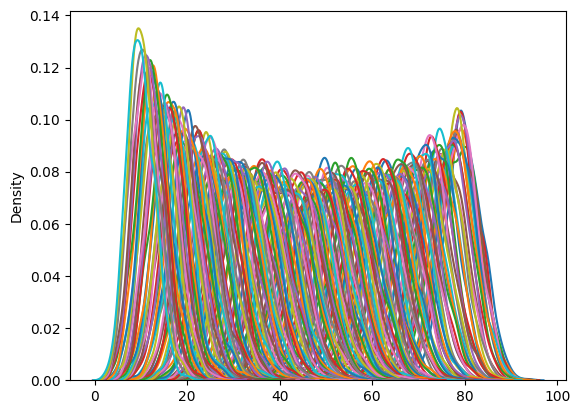

In [1282]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}', warn_singular=False)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

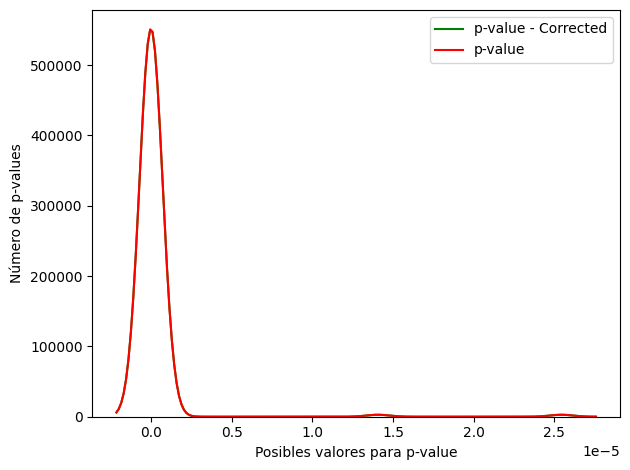

In [1283]:
sns.kdeplot(q_values, color='green', label='p-value - Corrected')
sns.kdeplot(p_values, color='red', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.legend()
plt.tight_layout()

In [1284]:
sum(rejected)/len(rejected)

1.0

In [1285]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 3

Llegué a un minúsculo pueblo con un aro reglamentario en la pared de una
escuela, había solamente 2 adolescentes, hice tirar a cada una 100 tiros, una obtuvo 80 y la otra
75.

In [1286]:
n_czt = 3
rondas = 1
mejor = 0.8
tiros = 100
jugadoras = 2
prob_enceste_jugadoras = [mejor, 0.75]

In [1287]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.8 	 	 80.001 	 0.80001 	 1000


In [1288]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

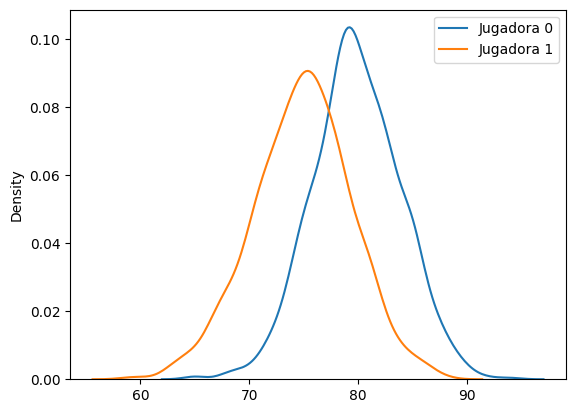

In [1289]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}', warn_singular=False)
plt.legend()

In [1290]:
sum(rejected)/len(rejected)

1.0

In [1291]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 4

Ehh, yo soy nueva y no tenía clara la regla de hacer tirar 100 tiros. Fui a un pueblo, había 100 adolescentes, le hice tirar 10 tiros a cada una. La mejor de ellas acierta 9 y la elegí como ganadora, luego ya hay varias con 8 aciertos, 7, etc


In [1292]:
n_czt = 4
rondas = 1
mejor = 0.9
tiros = 10
jugadoras = 100
prob_enceste_jugadoras = [mejor]+ [0.8]*2 + [0.7]*2
prob_enceste_jugadoras = np.append(prob_enceste_jugadoras, np.linspace(0.6, 0.1, jugadoras-len(prob_enceste_jugadoras)))

In [1293]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
10 	 0.671 	 	 8.996 	 0.8996000000000001 	 1000


In [1294]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

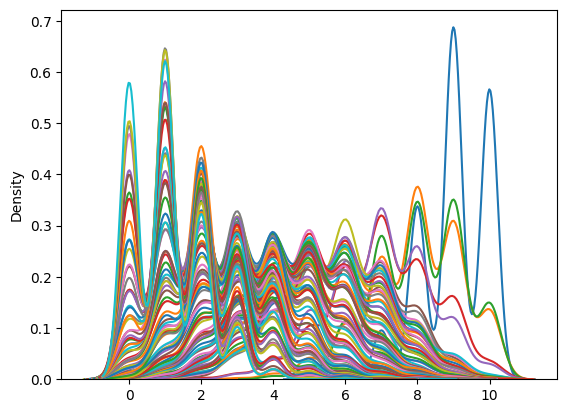

In [1295]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}', warn_singular=False)
plt.show()

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

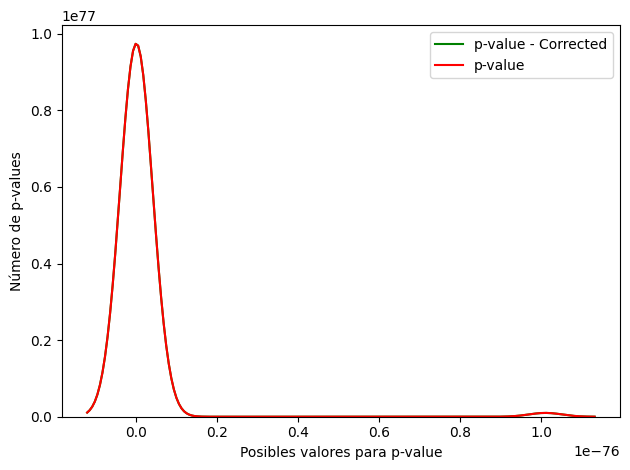

In [1296]:
sns.kdeplot(q_values, color='green', label='p-value - Corrected')
sns.kdeplot(p_values, color='red', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
# plt.xlim(0,1)
plt.legend()
plt.tight_layout()

In [1297]:
sum(rejected)/len(rejected)

1.0

In [1298]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 5

Había 100 adolescentes, las hice tirar una primer ronda de 100 tiros, me quedé
con las 5 mejores de esa primer ronda, y luego hice dos rondas más de 100 tiros, los resultados
fueron los siguientes

In [1299]:
jugadoras_cz5 ={
    "A": [85, 69, 70],
    "B": [84, 74, 76],
    "C": [84, 74, 75],
    "D": [82, 70, 73],
    "E": [81, 75, 74]
    }

print(jugadoras_cz5)

{'A': [85, 69, 70], 'B': [84, 74, 76], 'C': [84, 74, 75], 'D': [82, 70, 73], 'E': [81, 75, 74]}


In [1300]:
n_czt = 5
rondas = 3
mejor = np.mean(jugadoras_cz5['A'])/100
tiros = 100
jugadoras = len(jugadoras_cz5)
prob_enceste_jugadoras = [np.mean(v)/100 for _,v in jugadoras_cz5.items()]

In [1301]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.12 	 	 74.558 	 0.74558 	 1000


/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

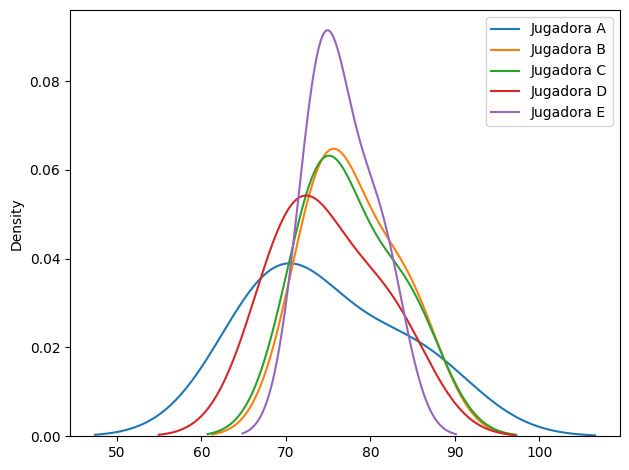

In [1302]:
for k,v in jugadoras_cz5.items():
    sns.kdeplot(v, label=f'Jugadora {k}')
plt.legend()
plt.tight_layout()

In [1303]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros, rondas)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

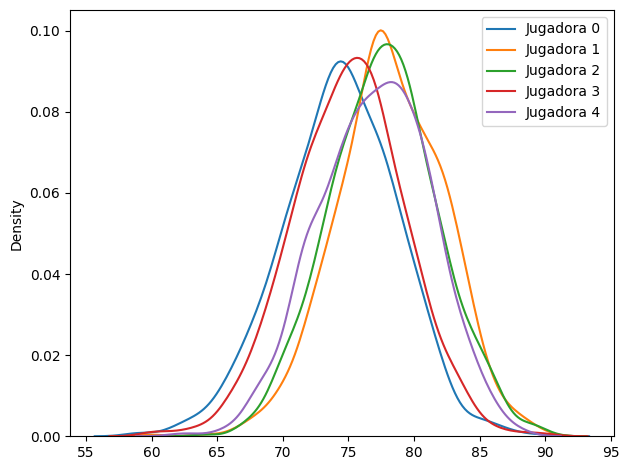

In [1304]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}')
plt.legend()
plt.tight_layout()

In [1305]:
sum(rejected)/len(rejected)

0.0

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/cg/6bd366p92fbb82w4cdb91yd40000gn/T/ipykernel_78026/3424888018.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(q_values, color='green', label='q-value')
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

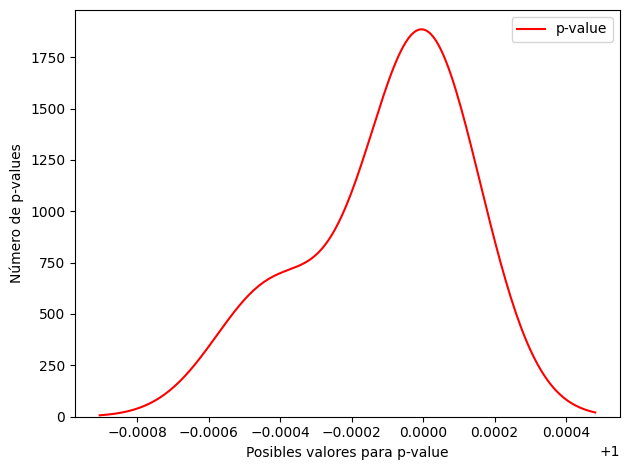

In [1306]:
sns.kdeplot(q_values, color='green', label='q-value')
sns.kdeplot(p_values, color='red', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.legend()
plt.tight_layout()

In [1307]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 6
Yo poseo 25 años de experiencia como cazatalentos y tengo muy buena intuición
para detectar el talento. Llegué a un pueblo donde habían 100 adolescentes, me senté en las
gradas del gimnasio y las observé detenidamente mientras precalentaban sin tirar al aro. A los 10
minutos, me paro, y señaló a una de ellas y le digo : 'tú, la número 13, a tirar 100 tiros; el resto, se
puede ir a la casa”. Y ahí al tirar esos 100 tiros logró 80 aciertos y esa es mi candidata.

> Esto resulta ser una total arbitrariedad.

In [1308]:
n_czt = 6
rondas = 1
mejor = 0.8
tiros = 100
jugadoras = 1
prob_enceste_jugadoras = [mejor]

Su arbitrariedad será castigada, como si hubiese todo el proceso de selección hubiese sido un falso positivo.

In [1309]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 1.0 	 	 79.97 	 0.7997000000000001 	 1000


In [1310]:
q_values

array([1., 1., 1., 1.])

In [1311]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 7
Llegué al pueblo,habían 100 adolescentes, y les hice tirar una primera ronda de
100 tiros libres a cada una. Luego, a las 5 mejores, las hice tirar una segunda ronda de 100 tiros, y
la mejor jugadora logró 80 aciertos en esta segunda ronda, y el resto 79, 78, 77 y 72.

In [1312]:
n_czt = 7
rondas = 2
mejor = 0.8
tiros = 100
jugadoras = 5
prob_enceste_jugadoras = [mejor, 0.79, 0.78, 0.77, 0.72]

In [1313]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.46 	 	 80.175 	 0.80175 	 1000


In [1314]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros, rondas)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

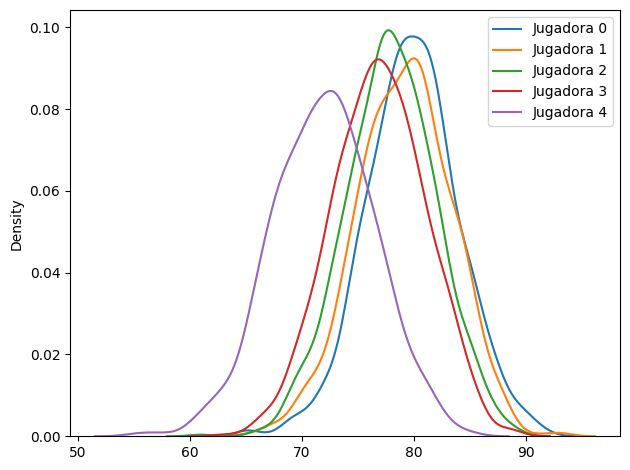

In [1315]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}')
plt.legend()
plt.tight_layout()

In [1316]:
sum(rejected)/len(rejected)

1.0

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

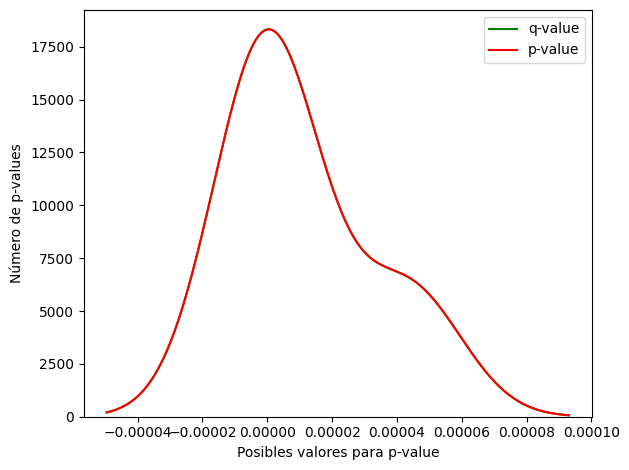

In [1317]:
sns.kdeplot(q_values, color='green', label='q-value')
sns.kdeplot(p_values, color='red', label='p-value')
plt.xlabel('Posibles valores para p-value')
plt.ylabel('Número de p-values')
plt.legend()
plt.tight_layout()

In [1318]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 8
Conozco desde hace una década a la profesora de educación física que está a cargo
del gimnasio del pueblo al que fui hoy. Llegué dos horas antes, y luego de ponernos al día, me
mostró una planilla Excel con los resultados de tiros libres de 30 de las 100 adolescentes que iban
a participar. Seguí el protocolo, hice tirar a cada una de los 100 adolescentes 100 tiros libres, hubo
una que hizo 85 encestes, un par 84, tres 83, y luego continuaba la escalerita. Quien logró los 85
encestes, a quien elegí, en la planilla de profesora tenía la semana previa 790 encestes de 1000
tiros libres.

In [1319]:
n_czt = 8
rondas = 1
mejor = (0.85*100 + 0.790*1000) / (100 + 1000)
tiros = 100
jugadoras = 100
prob_enceste_jugadoras = [mejor] + [0.85]*1 + [0.84]*2 + [0.83]*3
prob_enceste_jugadoras = np.append(prob_enceste_jugadoras, np.linspace(0.82, 0.1, jugadoras-len(prob_enceste_jugadoras)))

In [1320]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.022 	 	 79.357 	 0.79357 	 1000


In [1321]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros, rondas)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

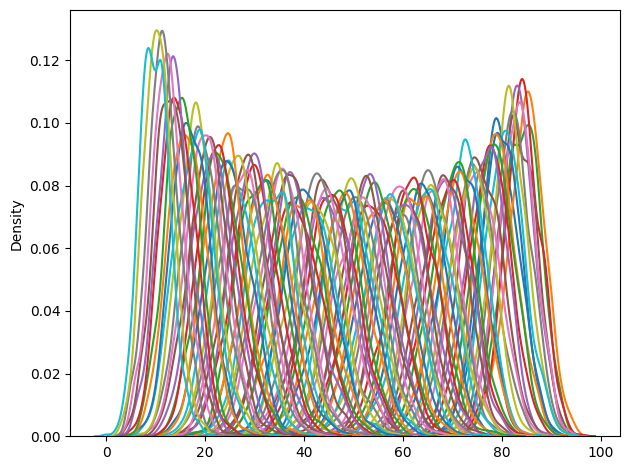

In [1322]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Jugadora {k}')
plt.tight_layout()

In [1323]:
sum(rejected)/len(rejected)

0.898989898989899

In [1324]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

## Cazatalentos 9

La cazatalentos 9 le dice a la entrenadora : "fui a una localidad de 500 habitantes,
había una sola adolescente interesada, la hice tirar 100 tiros libres, y encestó 80, tengo grabado
sin cortes los 100 tiros"

En realidad, esa adolescente es la sobrina de la cazatalentos, la hizo tirar 10 rondas de 100 tiros
cada una, grabó todas, pero solo trae la grabación de la mejor ronda a la entrenadora.
Los resultados obtenidos por su sobrina son

In [1325]:
intentos = [68, 74, 78, 70, 68, 63, 80, 68, 67, 65]

In [1332]:
n_czt = 9
rondas = 10
mejor = np.mean(intentos)/100
tiros = 100
jugadoras = 1
prob_enceste_jugadoras = [mejor, 0.80]

In [1333]:
p_elegir_correcta, perc_aciertos_prom = p_correcta(prob_enceste_jugadoras, [tiros])

Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.056 	 	 69.886 	 0.69886 	 1000


In [1334]:
cazatalentos_temp, p_values, q_values, rejected = run_cazatalentos(prob_enceste_jugadoras, tiros, rondas)

/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uribe/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

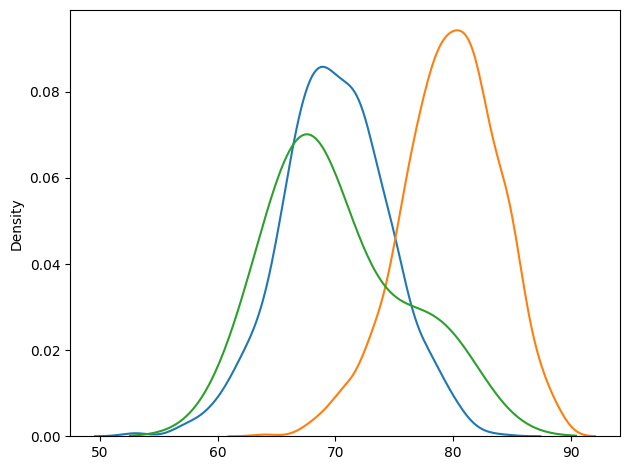

In [1335]:
for k,v in cazatalentos_temp.items():
    sns.kdeplot(v, label=f'Intento simulado')
sns.kdeplot(intentos, label=f'Intento previo')
plt.tight_layout()
plt.show()

In [1336]:
cazatalentos[n_czt] = {
    "mejor": mejor,
    "tiros": tiros,
    "jugadoras": jugadoras,
    "perc_falsos_positivos": sum(q_values > alpha) / len(q_values),
    "rondas": rondas,
    "p_correcta": p_elegir_correcta,
    "perc_aciertos_prom": perc_aciertos_prom
}

# Elección

In [1339]:
for k, v in cazatalentos.items():
    print(f"El cazatalentos {k} tiene {v['jugadoras']} jugadoras, de las cuales {v['perc_falsos_positivos']}% son falsos positivos")

El cazatalentos 1 tiene 100 jugadoras, de las cuales 0.0% son falsos positivos
El cazatalentos 2 tiene 200 jugadoras, de las cuales 0.0% son falsos positivos
El cazatalentos 3 tiene 2 jugadoras, de las cuales 0.0% son falsos positivos
El cazatalentos 4 tiene 100 jugadoras, de las cuales 0.0% son falsos positivos
El cazatalentos 5 tiene 5 jugadoras, de las cuales 1.0% son falsos positivos
El cazatalentos 6 tiene 1 jugadoras, de las cuales 1.0% son falsos positivos
El cazatalentos 7 tiene 5 jugadoras, de las cuales 0.0% son falsos positivos
El cazatalentos 8 tiene 100 jugadoras, de las cuales 0.10101010101010101% son falsos positivos
El cazatalentos 9 tiene 1 jugadoras, de las cuales 1.0% son falsos positivos


In [1340]:
df = pd.DataFrame(cazatalentos)
df = df.fillna(0)

In [1341]:
df = df.T

In [1342]:
df

,mejor,tiros,jugadoras,perc_falsos_positivos,rondas,p_correcta,perc_aciertos_prom
1,0.800000,100.0,100.0,0.00000,1.0,0.249,0.79979
2,0.800000,100.0,200.0,0.00000,1.0,0.152,0.79901
3,0.800000,100.0,2.0,0.00000,1.0,0.800,0.80001
4,0.900000,10.0,100.0,0.00000,1.0,0.671,0.89960
5,0.746667,100.0,5.0,1.00000,3.0,0.120,0.74558
6,0.800000,100.0,1.0,1.00000,1.0,1.000,0.79970
7,0.800000,100.0,5.0,0.00000,2.0,0.460,0.80175
8,0.795455,100.0,100.0,0.10101,1.0,0.022,0.79357
9,0.701000,100.0,1.0,1.00000,10.0,0.056,0.69886


In [1343]:
df["aciertos"] = df.apply(lambda x: np.random.binomial(100, x["mejor"], 5), axis=1)

df["aciertos_promedio"] = df["aciertos"].apply(lambda x: np.mean(x))
df["aciertos_std"] = df["aciertos"].apply(lambda x: np.std(x))
df["total_tiros"] = df["tiros"] * df["jugadoras"] * df["rondas"]

df = df.drop(["aciertos"], axis=1)

In [1344]:
df

,mejor,tiros,jugadoras,perc_falsos_positivos,rondas,p_correcta,perc_aciertos_prom,aciertos_promedio,aciertos_std,total_tiros
1,0.800000,100.0,100.0,0.00000,1.0,0.249,0.79979,77.6,4.841487,10000.0
2,0.800000,100.0,200.0,0.00000,1.0,0.152,0.79901,80.0,2.000000,20000.0
3,0.800000,100.0,2.0,0.00000,1.0,0.800,0.80001,77.6,3.006659,200.0
4,0.900000,10.0,100.0,0.00000,1.0,0.671,0.89960,88.6,4.127953,1000.0
5,0.746667,100.0,5.0,1.00000,3.0,0.120,0.74558,74.2,1.469694,1500.0
6,0.800000,100.0,1.0,1.00000,1.0,1.000,0.79970,83.0,2.966479,100.0
7,0.800000,100.0,5.0,0.00000,2.0,0.460,0.80175,80.6,4.963869,1000.0
8,0.795455,100.0,100.0,0.10101,1.0,0.022,0.79357,82.6,5.161395,10000.0
9,0.701000,100.0,1.0,1.00000,10.0,0.056,0.69886,68.6,5.425864,1000.0


In [1347]:
df = df.sort_values(
    ['perc_falsos_positivos', "rondas", "jugadoras", "total_tiros", 'aciertos_promedio', 'aciertos_std', "mejor", 'p_correcta'],
    ascending = [True, False, False, False, False, True, False, False]
    )
df

,mejor,tiros,jugadoras,perc_falsos_positivos,rondas,p_correcta,perc_aciertos_prom,aciertos_promedio,aciertos_std,total_tiros
7,0.800000,100.0,5.0,0.00000,2.0,0.460,0.80175,80.6,4.963869,1000.0
2,0.800000,100.0,200.0,0.00000,1.0,0.152,0.79901,80.0,2.000000,20000.0
1,0.800000,100.0,100.0,0.00000,1.0,0.249,0.79979,77.6,4.841487,10000.0
4,0.900000,10.0,100.0,0.00000,1.0,0.671,0.89960,88.6,4.127953,1000.0
3,0.800000,100.0,2.0,0.00000,1.0,0.800,0.80001,77.6,3.006659,200.0
8,0.795455,100.0,100.0,0.10101,1.0,0.022,0.79357,82.6,5.161395,10000.0
9,0.701000,100.0,1.0,1.00000,10.0,0.056,0.69886,68.6,5.425864,1000.0
5,0.746667,100.0,5.0,1.00000,3.0,0.120,0.74558,74.2,1.469694,1500.0
6,0.800000,100.0,1.0,1.00000,1.0,1.000,0.79970,83.0,2.966479,100.0
